In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base =  pd.read_csv('../Bases/Criados/1_base_bruta.csv')

In [3]:
colunas_categoricas = ['V0001', 'V0015', 'V0026', 'V0031', 'B001', 'C006', 'C009', 'C011', 'C012','D00901', 'D014', 'D015', 'E027', 
                        'F001011', 'F007011', 'F008011', 'VDF001', 'F016', 'G059', 'G060', 'G062', 'G032', 
                        'I00102', 'I006', 'I004', 'I00401', 'I00402', 'I00403','I012', 'J001', 'J00101', 'J01101', 'J060',
                        'M001', 'M00203', 'M00302', 'M011011', 'M011021', 'M011051', 'M011071', 'N004', 'N005', 'N008', 'N010', 'N011', 'N012', 'N016', 'P02601', 'P027',
                        'P04501', 'P04502', 'P050', 'P051', 'P052', 'P05401', 'P05404', 'P05407', 'P05410', 'P05413', 'P05416', 'P05419', 'P06701', 'P068', 
                        'Q00201', 'Q03001', 'Q060', 'Q06306', 'Q06601', 'Q068', 'Q11006', 'Q128', 'R034']


colunas_numericas = ['C008', 'E01602', 'E017', 'E01802', 'E019', 'F001021', 'F007021', 'F008021', 'VDF00102', 'P00104', 'P00404', 'P00901', 
                    'P01101', 'P02001', 'P018', 'P02002', 'P02501', 'P02602', 'P02801', 'P029', 'P035', 'P03701', 'P03702', 'P053']


In [4]:
for coluna in colunas_numericas:
    base[coluna] = pd.to_numeric(base[coluna], errors='coerce')

### Visualização dos outliers

In [5]:
Q1 = base[colunas_numericas].quantile(0.25)
Q3 = base[colunas_numericas].quantile(0.75)
IQR = Q3 - Q1

In [6]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [7]:
outliers = ((base[colunas_numericas] < limite_inferior) | (base[colunas_numericas] > limite_superior)).sum()
print("\nNúmero de outliers por atributo (método IQR):")
print(outliers)


Número de outliers por atributo (método IQR):
C008           0
E01602      1232
E017         704
E01802        54
E019          17
F001021      812
F007021       41
F008021       94
VDF00102      98
P00104       389
P00404       125
P00901         0
P01101         0
P02001      5006
P018           0
P02002      1966
P02501      1350
P02602      2212
P02801       568
P029         259
P035           0
P03701       137
P03702         0
P053         610
dtype: int64


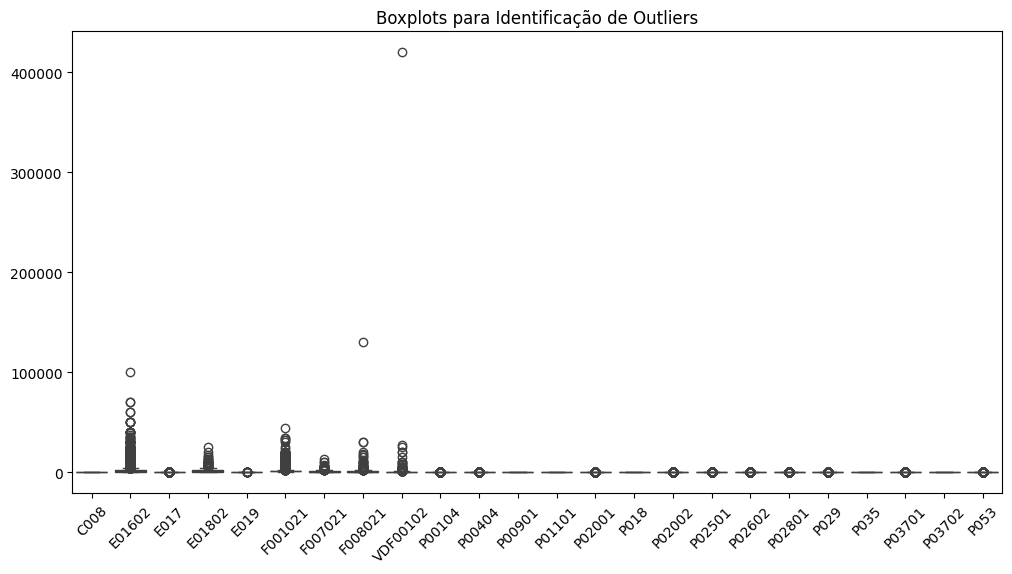

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=base[colunas_numericas])
plt.xticks(rotation=45)
plt.title('Boxplots para Identificação de Outliers')
plt.show()

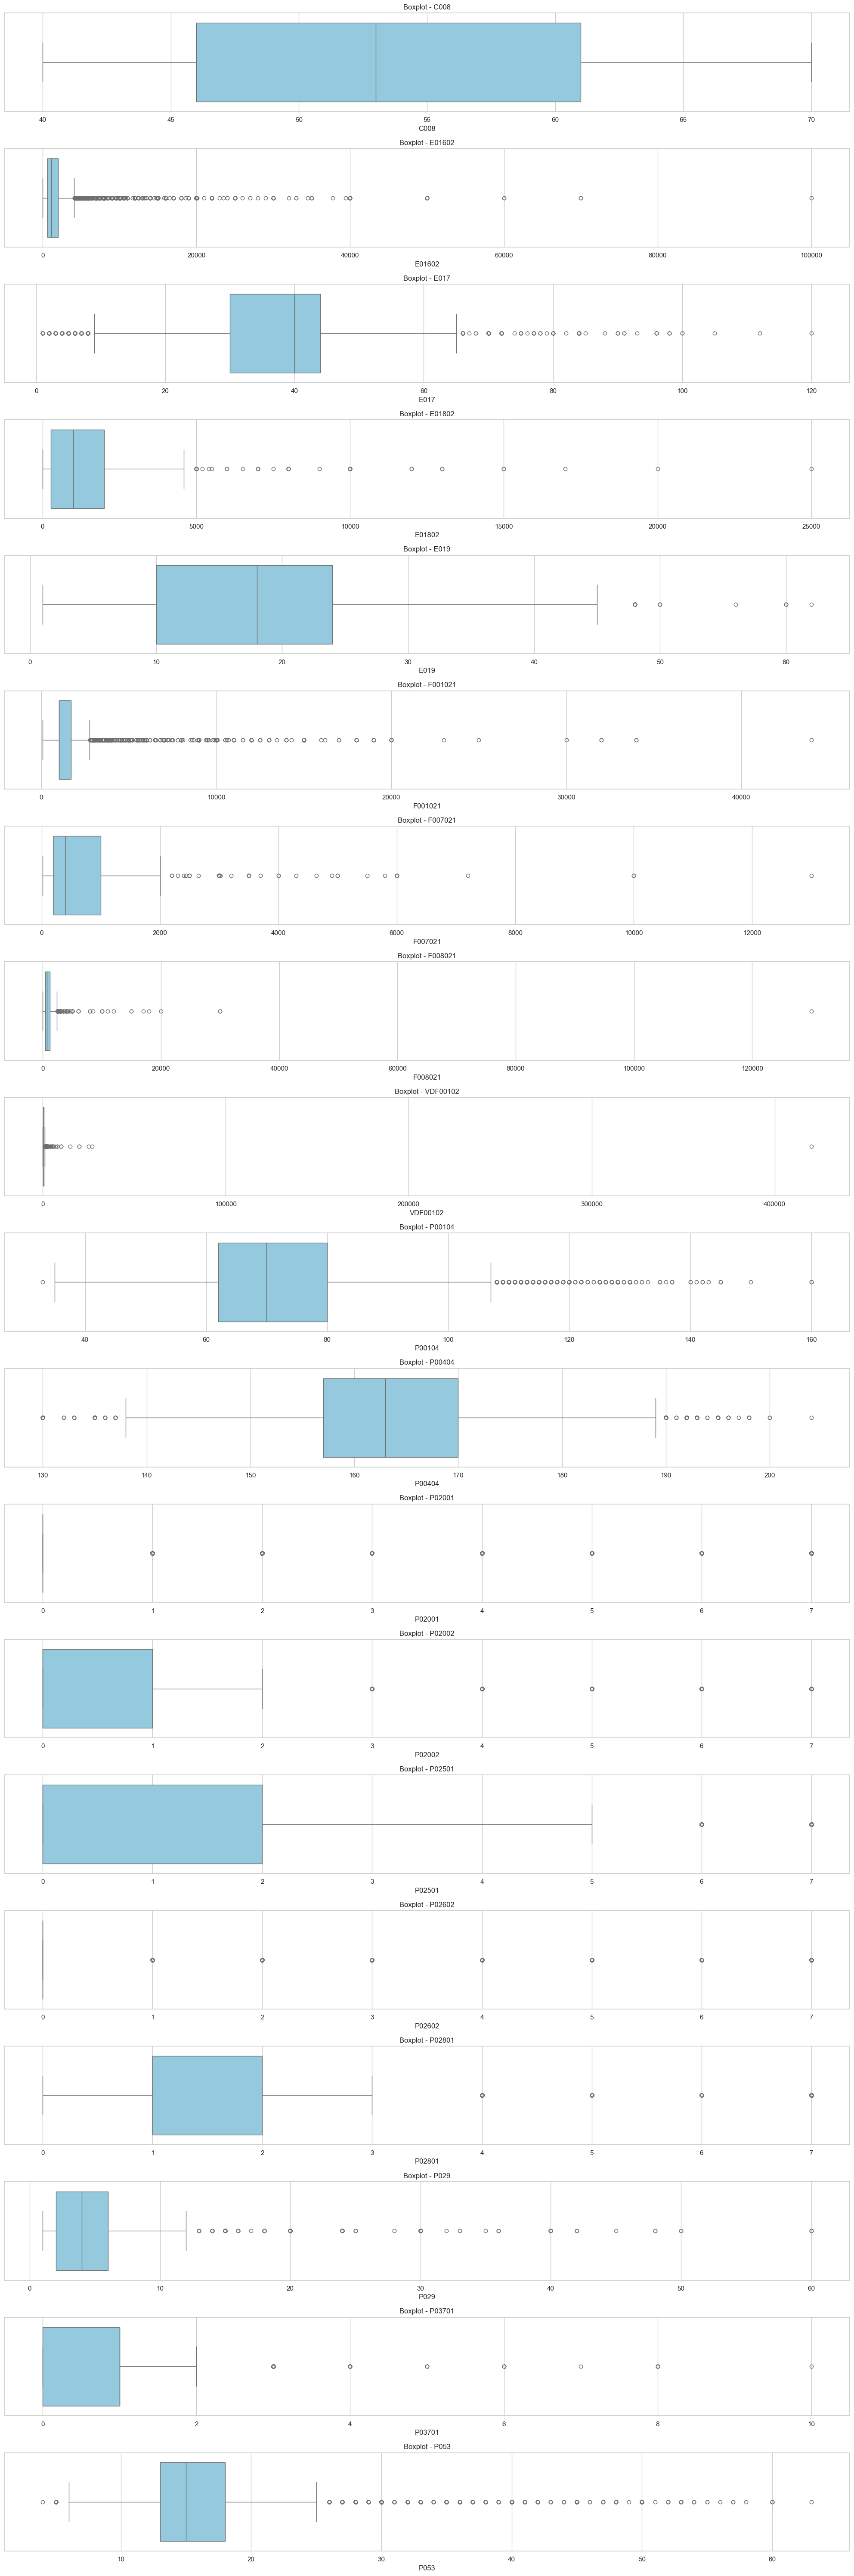

In [9]:
variaveis = [
    'C008', 'E01602', 'E017', 'E01802', 'E019', 'F001021',
    'F007021', 'F008021', 'VDF00102', 'P00104', 'P00404',
    'P02001', 'P02002', 'P02501', 'P02602', 'P02801', 'P029',
    'P03701', 'P053'
]
'''
E01602 - Qual era o rendimento bruto mensal ou retirada que _ fazia normalmente nesse trabalho? (valor em dinheiro)
E017 - Quantas horas _ trabalhava normalmente, por semana, nesse trabalho?
E01802 - Qual era o rendimento bruto mensal ou retirada que _ fazia normalmente nesse(s) outro(s) trabalho(s)? (valor em dinheiro)
E019 - Quantas horas _ trabalhava normalmente, por semana, nesses outros trabalhos?
F001021 -
F007021 -
F008021 -
VDF00102 -
P00104 - Peso - Final (em kg) (3 inteiros e 1 casa decimal)  
P00404 - Altura - Final (em cm) (3 inteiros)
P02001 - Em quantos dias da semana costuma tomar suco de caixinha/lata ou refresco em pó?  
P02002 - Em quantos dias da semana costuma tomar refrigerante?
P02501 - Em quantos dias da semana costuma comer alimentos doces como biscoito/bolacha recheado, chocolate, gelatina, balas e outros?
P02602 - Em quantos dias da semana costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc.?  
P02801 - Quantos dias por semana costuma consumir alguma bebida alcoólica?  
P029 - Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?
P03701 - Em geral, no dia que pratica exercício ou esporte, quanto tempo em horas dura essa atividade?
P053 - Que idade tinha quando começou a fumar produto de tabaco diariamente?
'''
 
# Configurações gerais de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(20, 60))

# Criar um boxplot para cada variável
for i, var in enumerate(variaveis):
    plt.subplot(len(variaveis), 1, i + 1)
    sns.boxplot(x=base[var], color='skyblue')
    plt.title(f'Boxplot - {var}')
    plt.tight_layout()

plt.show()

In [ ]:
base.to_csv('../Bases/Criados/2_base_sem_outliers.csv', index=False)

### Não houve eliminação de outliers!